In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Data**

In [3]:
data=pd.read_csv("/kaggle/input/titanic/train.csv")

# **Basic Data Inspection**

* Target variable - Survived
* Identifier variable - PassesngerId
* Features - Everything else

In [4]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.shape

(891, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Target variable inspection**

In [8]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [9]:
(data['Survived'].value_counts()/data.shape[0])*100

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64

**Duplicated Rows**

In [10]:
data[data.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


**Categorical value sanity**

In [11]:
categorical_col=data.select_dtypes(include=['object','category']).columns
categorical_col

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [12]:
for col in categorical_col:
    print("-"*20)
    print(f"Column:{col}")
    print("Unique value:",data[col].nunique())
    print("Value counts:",data[col].value_counts(dropna=False))

--------------------
Column:Name
Unique value: 891
Value counts: Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64
--------------------
Column:Sex
Unique value: 2
Value counts: Sex
male      577
female    314
Name: count, dtype: int64
--------------------
Column:Ticket
Unique value: 681
Value counts: Ticket
347082              7
1601                7
CA. 2343            7
3101

* Since unique value for Name and Ticket are nearly equal to no. of rows they can be dropped

# **Handling Missing Values**

In [13]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
(data.isnull().sum()/data.shape[0])*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

* For embarked, missing percentage is 0.2%. They are missing because they are not recorded as there should be a boarding point for every passenger

In [15]:
data['Embarked'].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [16]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

<Axes: xlabel='Age', ylabel='Count'>

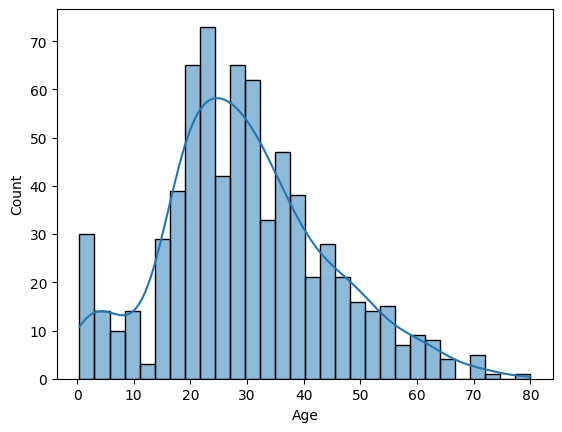

In [17]:
sns.histplot(data['Age'], bins=30, kde=True)

* Checking for the relationship of Age with other features to impute

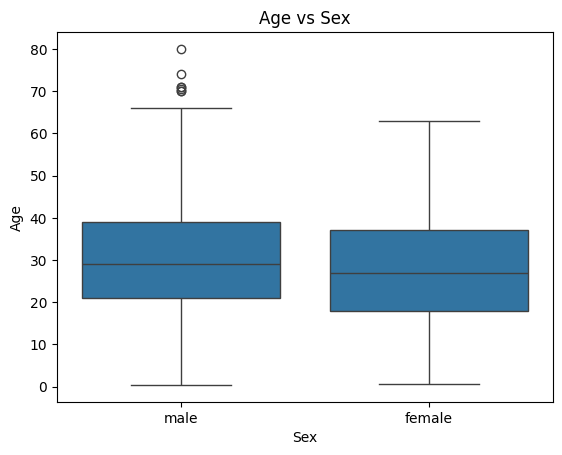

In [18]:
sns.boxplot(data=data, x='Sex', y='Age')
plt.title("Age vs Sex")
plt.show()

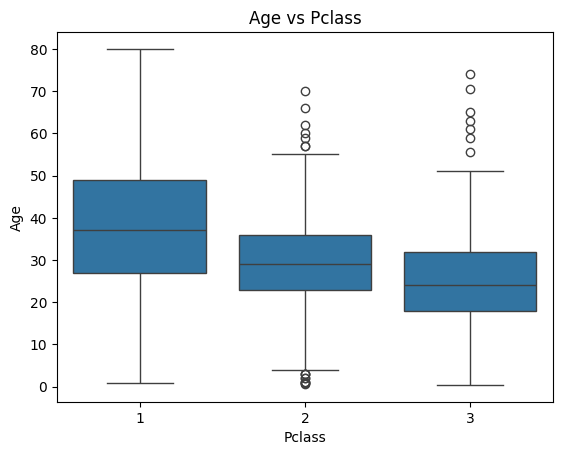

In [19]:
sns.boxplot(data=data, x='Pclass', y='Age')
plt.title("Age vs Pclass")
plt.show()


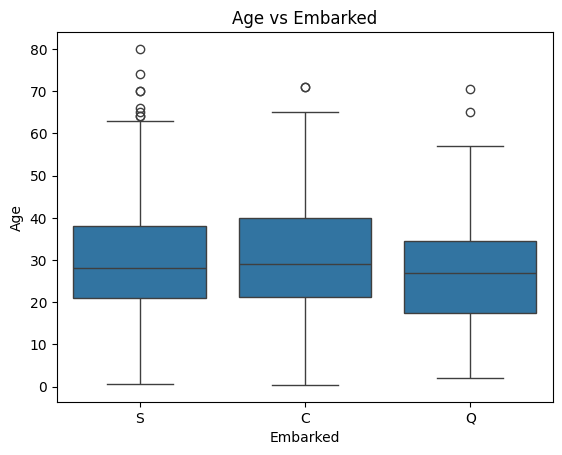

In [20]:
sns.boxplot(data=data, x='Embarked', y='Age')
plt.title("Age vs Embarked")
plt.show()


In [21]:
data['Age'] = data['Age'].fillna(data.groupby('Pclass')['Age'].transform('median'))


In [22]:
data.drop(columns=['Cabin'], inplace=True)

* imputed Embarked with mode because distribution of class for S is high which introduces only minimal bias
* imputed age with median of pclass because they are highly relted with Pclass
* just droped the feature Cabin because missing value is around 70%

# **Dropping Unwanted Columns**

Keeping Name for extracting the title in the name and removing other identifier and feature with high unique values such as passengerid and Ticket

In [23]:
data.drop(columns=['PassengerId', 'Ticket'], inplace=True)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


# **Feature Understanding**

**Univariate Analysis** - understanding each feature individually

In [25]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

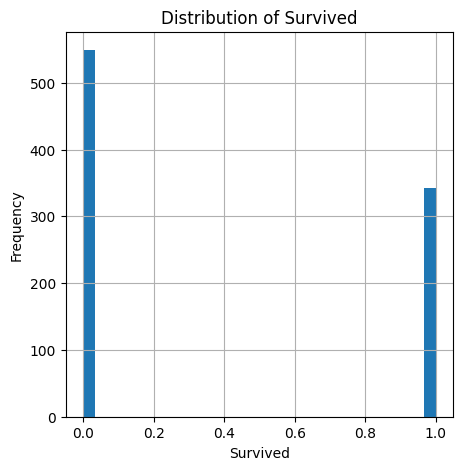

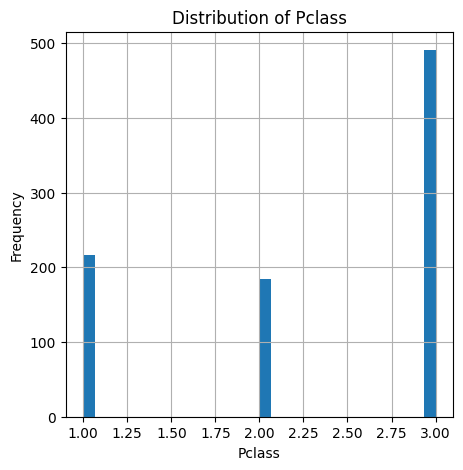

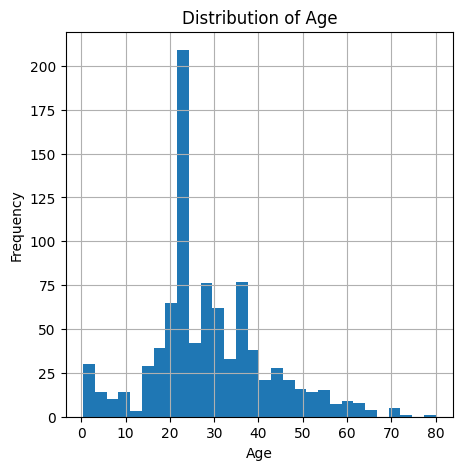

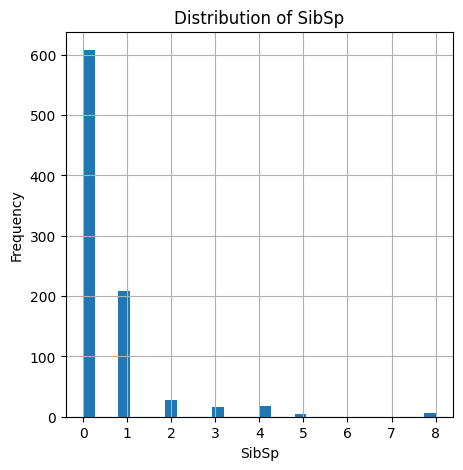

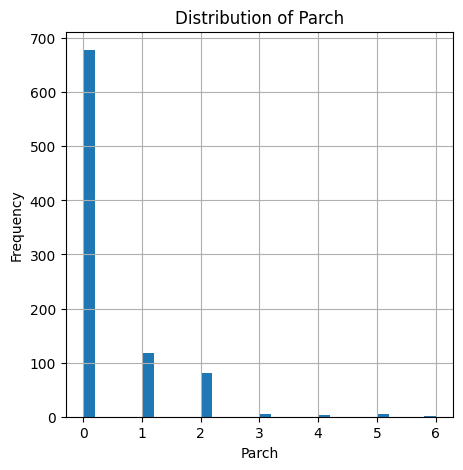

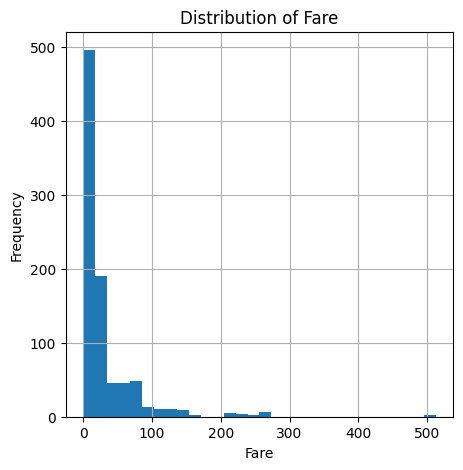

In [26]:
for col in num_cols:
    plt.figure(figsize=(5,5))
    data[col].hist(bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

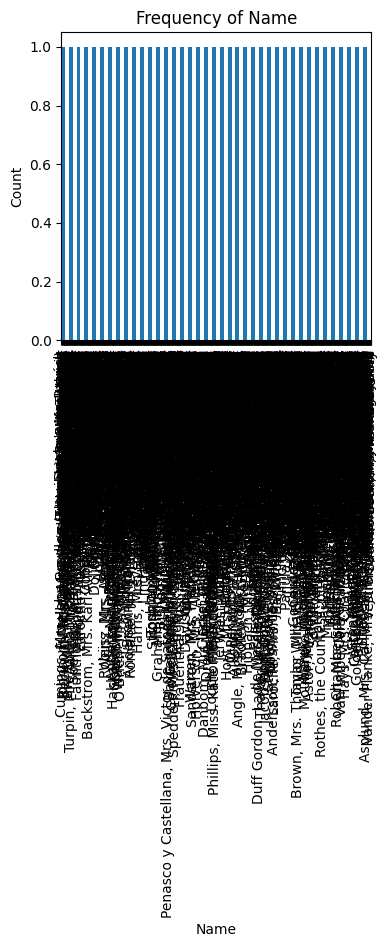

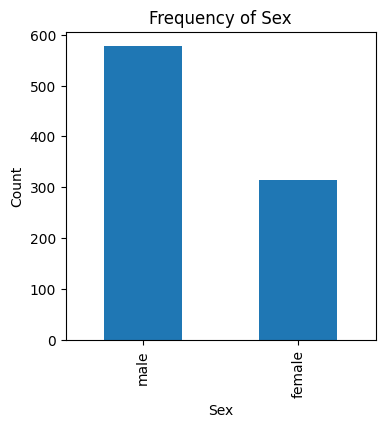

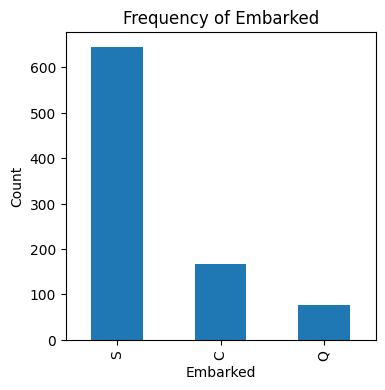

In [27]:
for col in cat_cols:
    plt.figure(figsize=(4,4))
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

**Bivariate analysis** - understanding how each feature affect target variable

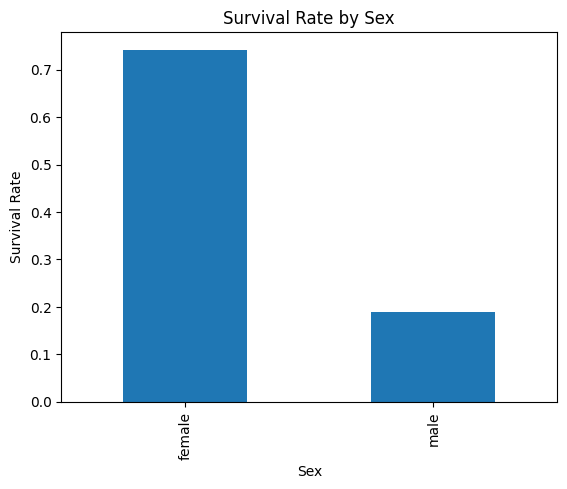

In [28]:
survival_rate = data.groupby('Sex')['Survived'].mean()
survival_rate.plot(kind='bar')
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Sex')
plt.show()

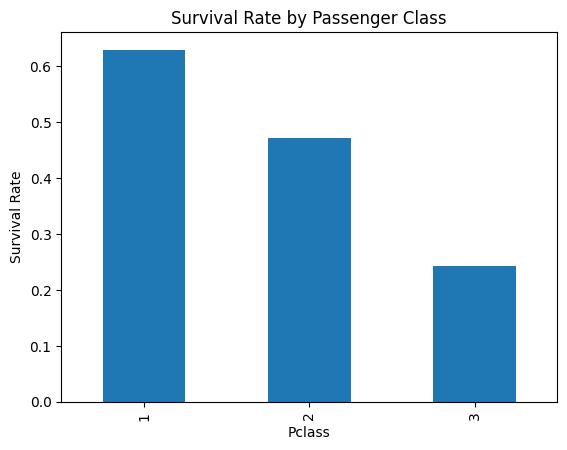

In [29]:
survival_rate = data.groupby('Pclass')['Survived'].mean()
survival_rate.plot(kind='bar')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Pclass')
plt.show()

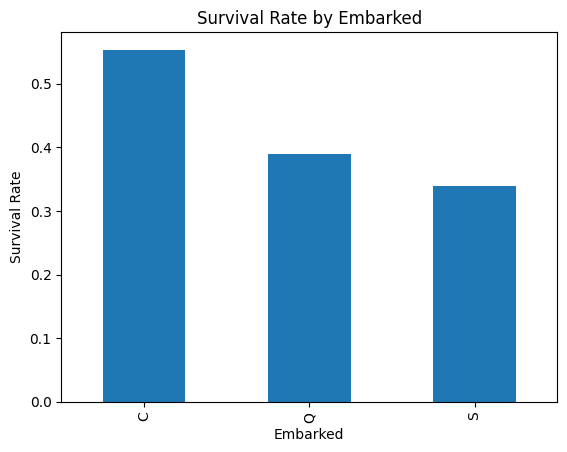

In [30]:
survival_rate = data.groupby('Embarked')['Survived'].mean()
survival_rate.plot(kind='bar')
plt.title('Survival Rate by Embarked')
plt.ylabel('Survival Rate')
plt.xlabel('Embarked')
plt.show()


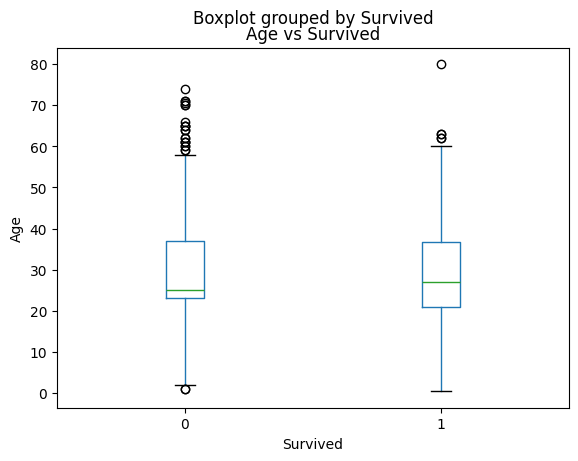

In [31]:
data.boxplot(column='Age', by='Survived',grid=False)
plt.title('Age vs Survived')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

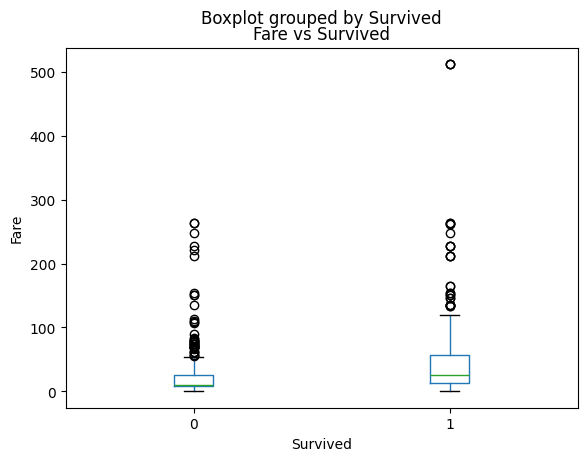

In [32]:
data.boxplot(column='Fare', by='Survived',grid=False)
plt.title('Fare vs Survived')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

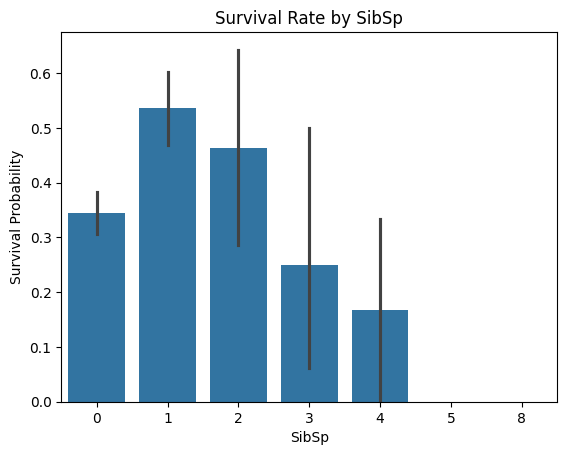

In [33]:
sns.barplot(x='SibSp', y='Survived', data=data)
plt.title('Survival Rate by SibSp')
plt.ylabel('Survival Probability')
plt.show()

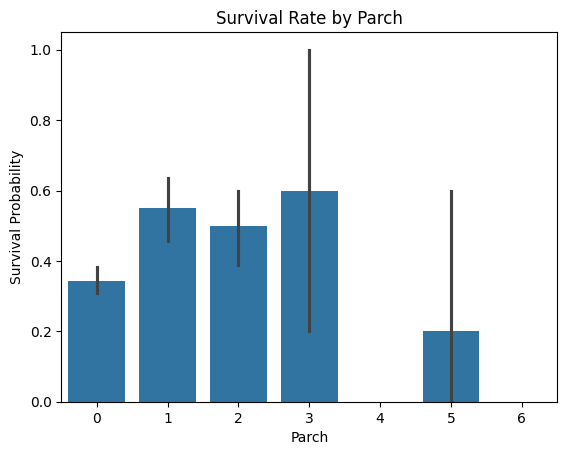

In [34]:
sns.barplot(x='Parch', y='Survived', data=data)
plt.title('Survival Rate by Parch')
plt.ylabel('Survival Probability')
plt.show()


**INSIGHTS**
* Female has more survival rate
* As passenger class increases survival rate decreases
* Passenger from C are saved more but cant really differntiate Q and S
* younger passenger have higher probability of surviving
* passenger who paid more are more likely to survive
* passenger with 1-2 sibling/spouse and 1-3 children/parent survived more

CONCLUSION:
    Embarked,age,fare,sibsp,parch are week features as alone that needs to be assisted with other features but sex,pclass are more strong features

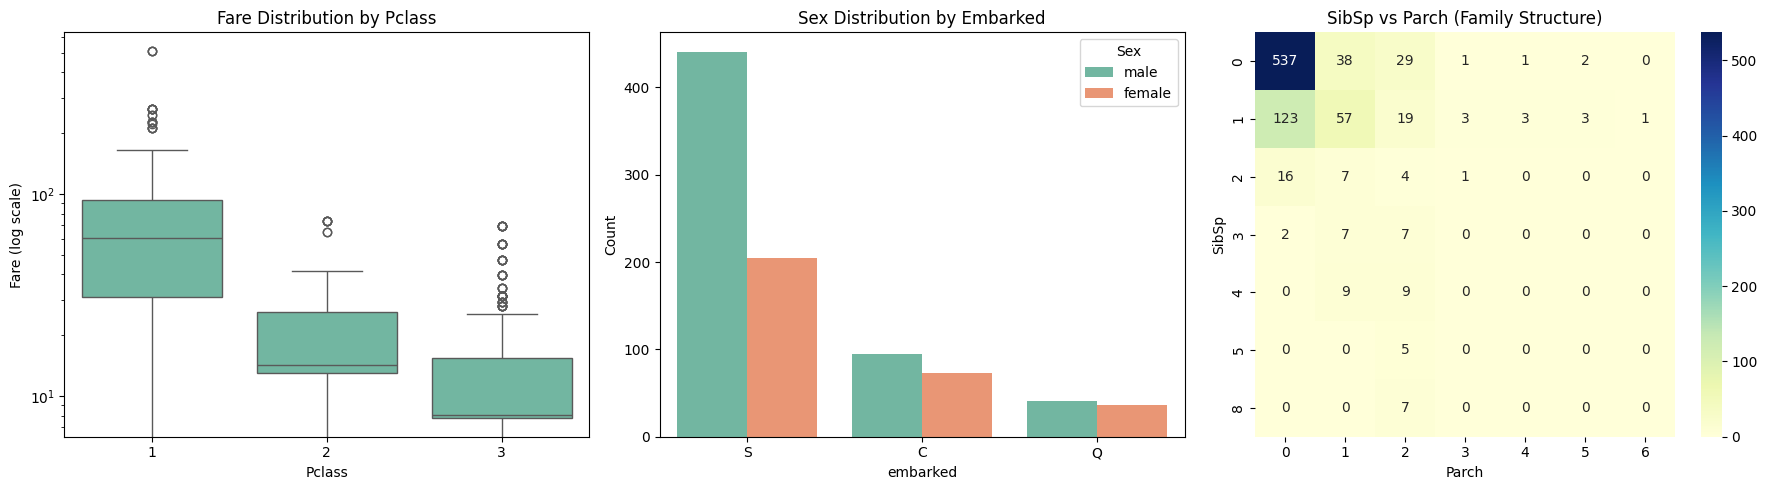

In [35]:
sns.set_palette('Set2')

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x='Pclass', y='Fare', data=data, ax=axes[0])
axes[0].set_yscale('log')
axes[0].set_title('Fare Distribution by Pclass')
axes[0].set_xlabel('Pclass')
axes[0].set_ylabel('Fare (log scale)')

sns.countplot(x='Embarked', hue='Sex', data=data, ax=axes[1])
axes[1].set_title('Sex Distribution by Embarked')
axes[1].set_xlabel('embarked')
axes[1].set_ylabel('Count')

ct = pd.crosstab(data['SibSp'], data['Parch']) 
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu', ax=axes[2])
axes[2].set_title('SibSp vs Parch (Family Structure)')
axes[2].set_xlabel('Parch')
axes[2].set_ylabel('SibSp')

plt.tight_layout()
plt.show()


* fare and pclass are negatively correlated, so one feature is enough to train the model
* sibsp and parch can be combined to one feature as family size

**Multivariate analysis** - with the target variable

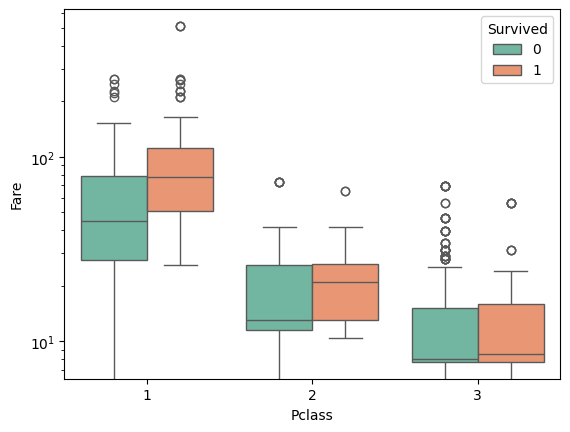

In [36]:
sns.boxplot(x='Pclass', y='Fare',hue='Survived', data=data)
plt.yscale('log')
plt.show()

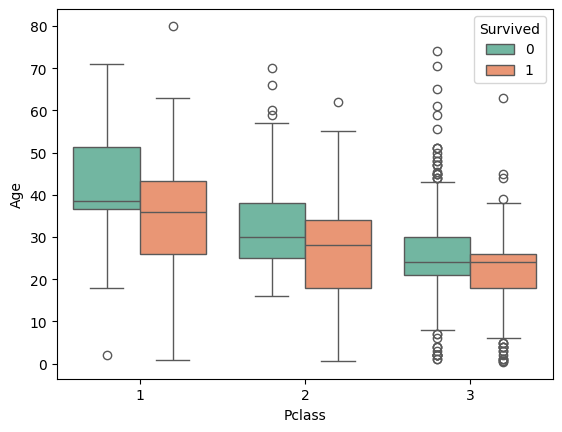

In [37]:
sns.boxplot(x='Pclass', y='Age',hue='Survived', data=data)
plt.show()

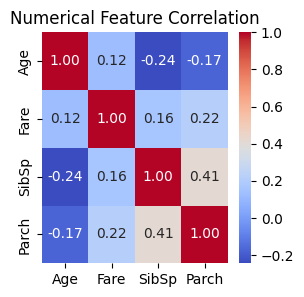

In [38]:
num_col=['Age','Fare','SibSp','Parch']
cor = data[num_col].corr()
plt.figure(figsize=(3,3))
sns.heatmap(cor, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Numerical Feature Correlation')
plt.show()

**INSIGHTS**
* survival reduces as pclass increases and children or mostly saved
* passenger who paid more for pclass 1 are more saved then 2 and 3
* parch and sibsp are highly related and they are combinely related with fare

# **Feature Engineering**

**Conclusion**
* make the week featues SibSp and Parch as familysize
* make fare as fare_log because fare is highly skewed
* age can be grouped into predefined groups
* name is highly unique so we can extarct title from that

In [39]:
data['Familysize']=data['SibSp']+data['Parch']+1

In [40]:
data['IsAlone'] = (data['Familysize'] == 1).astype(int)

In [41]:
data.drop(columns=['SibSp','Parch'],inplace=True)

In [42]:
data['Fare_log']=np.log1p(data['Fare'])
data.drop('Fare',axis=1,inplace=True)

In [43]:
data['Fare_per_person'] = data['Fare_log'] / data['Familysize']
data.drop('Fare_log',axis=1,inplace=True)

<Axes: >

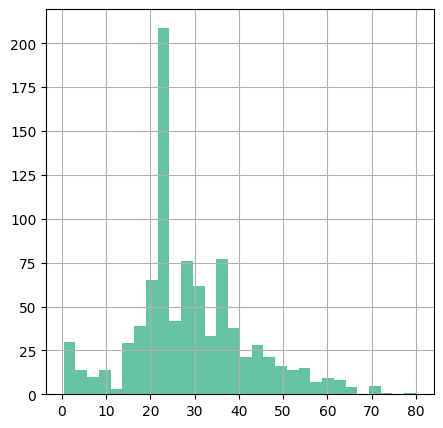

In [44]:
plt.figure(figsize=(5,5))
data['Age'].hist(bins=30)

In [45]:
bins = [0,12,18,35,60,100]
labels = ['Child','Teen','Young','Adult','Senior']
data['Age_group'] = pd.cut(data['Age'], bins=bins, labels=labels)

In [46]:
data.drop('Age',axis=1,inplace=True)

In [47]:
data['Title'] = data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

In [48]:
data['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [49]:

data['Title'] = data['Title'].replace([
    'Lady', 'Countess','Capt','Col','Don','Dr','Major','Rev',
    'Sir','Jonkheer','Dona'
], 'Rare')

data['Title'] = data['Title'].replace({
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs'
})


In [50]:
data.drop('Name',axis=1,inplace=True)

# **Encoding Categorical Values**

In [51]:
data['Sex']=data['Sex'].map({'male': 0, 'female': 1})

In [52]:
age_map = {'Child': 0,'Teen': 1,'Young': 2,'Adult': 3,'Senior': 4}
data['Age_group'] = data['Age_group'].map(age_map)

In [53]:
data = pd.get_dummies(data,columns=['Embarked', 'Title'],drop_first=True)

In [54]:
data = data.astype(int)

# **Spliting data and training Models**

In [55]:
from sklearn.model_selection import train_test_split

X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = {
    "LogReg": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "RF": RandomForestClassifier(n_estimators=200, random_state=42)
}

for name, m in models.items():
    if name in ['LogReg','SVM']:
        m.fit(X_train_scaled, y_train)
        preds = m.predict(X_test_scaled)
    else:
        m.fit(X_train, y_train)
        preds = m.predict(X_test)

    print(name)
    print(classification_report(y_test, preds))


LogReg
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       110
           1       0.83      0.75      0.79        69

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

SVM
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       110
           1       0.86      0.70      0.77        69

    accuracy                           0.84       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179

RF
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       110
           1       0.77      0.64      0.70        69

    accuracy                           0.79       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



In [58]:
final_model = LogisticRegression(
    C=1,
    penalty='l2',
    solver='liblinear',
    max_iter=1000
)
final_model.fit(X_train_scaled, y_train)

LogisticRegression(C=1, max_iter=1000, solver='liblinear')

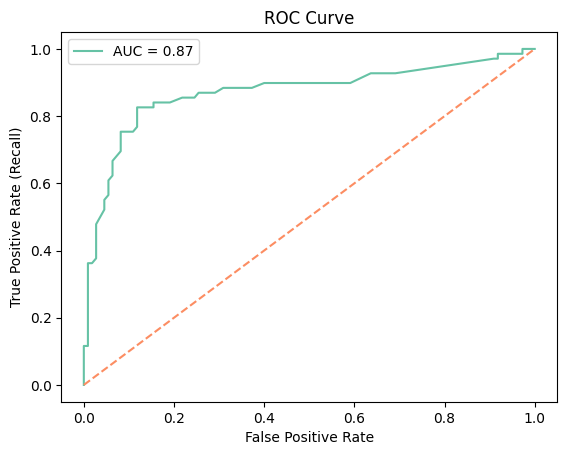

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = final_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [60]:
import pandas as pd
import numpy as np

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': final_model.coef_[0]
})

# Sort by absolute importance
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(
    by='Abs_Coefficient', ascending=False
)

print(feature_importance)


            Feature  Coefficient  Abs_Coefficient
9          Title_Mr    -1.235053         1.235053
0            Pclass    -0.793275         0.793275
1               Sex     0.635405         0.635405
2        Familysize    -0.546513         0.546513
4   Fare_per_person     0.512374         0.512374
5         Age_group    -0.436482         0.436482
8        Title_Miss    -0.436391         0.436391
3           IsAlone    -0.419844         0.419844
11       Title_Rare    -0.322409         0.322409
7        Embarked_S    -0.114252         0.114252
6        Embarked_Q     0.098531         0.098531
10        Title_Mrs    -0.097172         0.097172


**After pruning of less important features**

In [61]:
data.drop(columns=['Embarked_S','Embarked_Q'],axis=1,inplace=True)

In [62]:
X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

models = {
    "LogReg": LogisticRegression(max_iter=1000,class_weight='balanced'),
    "SVM": SVC(C=3),
    "RF": RandomForestClassifier(n_estimators=200, random_state=42)
}

for name, m in models.items():
    if name in ['LogReg','SVM']:
        m.fit(X_train_scaled, y_train)
        preds = m.predict(X_test_scaled)
    else:
        m.fit(X_train, y_train)
        preds = m.predict(X_test)

    print(name)
    print(classification_report(y_test, preds))


LogReg
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       110
           1       0.78      0.83      0.80        69

    accuracy                           0.84       179
   macro avg       0.83      0.84      0.84       179
weighted avg       0.85      0.84      0.84       179

SVM
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179

RF
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       110
           1       0.77      0.62      0.69        69

    accuracy                           0.78       179
   macro avg       0.78      0.75      0.76       179
weighted avg       0.78      0.78      0.78       179



In [63]:
final_model = LogisticRegression(
    C=1,
    penalty='l2',
    solver='liblinear',
    class_weight='balanced',
    max_iter=1000
)
final_model.fit(X_train_scaled, y_train)
final_preds = final_model.predict(X_test_scaled)

print("Final Logistic Regression Model")
print(classification_report(y_test, final_preds))

Final Logistic Regression Model
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       110
           1       0.78      0.83      0.80        69

    accuracy                           0.84       179
   macro avg       0.83      0.84      0.84       179
weighted avg       0.85      0.84      0.84       179



In [64]:
    df=pd.read_csv('/kaggle/input/titanic/test.csv')
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    df['Age'] = df['Age'].fillna(df.groupby('Pclass')['Age'].transform('median'))
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    df.drop(columns=['Cabin', 'Ticket'], inplace=True, errors='ignore')
    df['Familysize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['Familysize'] == 1).astype(int)
    df.drop(columns=['SibSp','Parch'], inplace=True)
    df['Fare_log'] = np.log1p(df['Fare'])
    df.drop('Fare', axis=1, inplace=True)
    df['Fare_per_person'] = df['Fare_log'] / df['Familysize']
    df.drop('Fare_log',axis=1,inplace=True)
    bins = [0,12,18,35,60,100]
    labels = ['Child','Teen','Young','Adult','Senior']
    df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)
    df.drop('Age', axis=1, inplace=True)
    df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(
        ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev',
         'Sir','Jonkheer','Dona'],
        'Rare'
    )
    df['Title'] = df['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})
    df.drop('Name', axis=1, inplace=True)
    df['Sex'] = df['Sex'].map({'male':0, 'female':1})
    age_map = {'Child':0,'Teen':1,'Young':2,'Adult':3,'Senior':4}
    df['Age_group'] = df['Age_group'].map(age_map)
    df = pd.get_dummies(df, columns=['Embarked','Title'], drop_first=True)


In [65]:
X, df = X.align(df, join='left', axis=1, fill_value=0)
df_scaled = scaler.transform(df)
test_preds = final_model.predict(df_scaled)
submission = pd.DataFrame({
    'PassengerId': pd.read_csv('/kaggle/input/titanic/test.csv')['PassengerId'],
    'Survived': test_preds
})

submission.to_csv('submission.csv', index=False)

In [66]:
pd.read_csv("/kaggle/working/submission.csv").head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
